In [ ]:
import numpy as np
import matplotlib.pyplot as plt

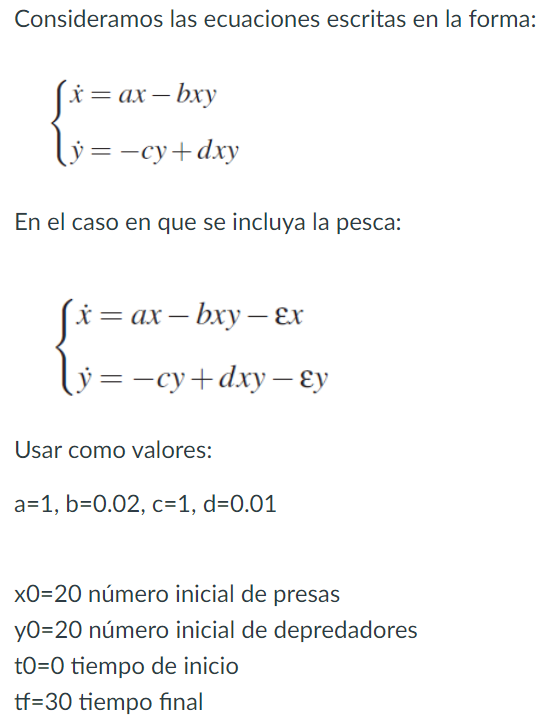

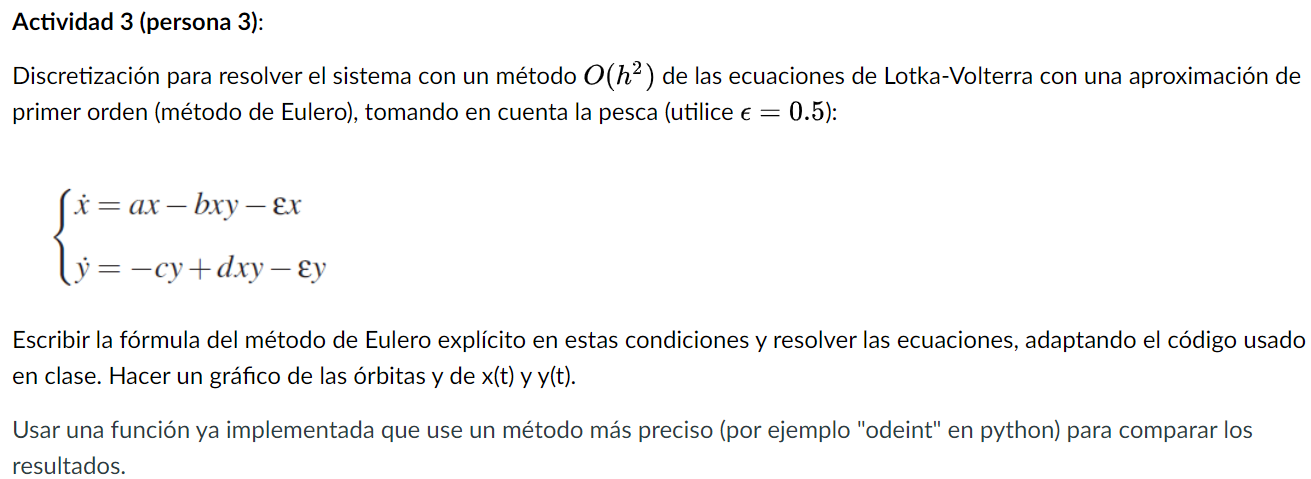

In [ ]:
t0 = 0.0      # tiempo inicial
tf = 30.0     # tiempo final
h = 0.01      # paso
Nx = 20.0     # Condición inicial en x (N)
My= 20.0      # Condición inicial en y (M)
a = 1.0
b = 0.02
c = 1.0
d = 0.01
e = 0.5

In [ ]:
nt = int((tf-t0)/h) #número de pasos en x
N = np.empty(nt+1) 
N[0]=Nx
mt = int((tf-t0)/h) #número de pasos en y
M = np.empty(mt+1) 
M[0]= My

for step in range(nt):
  N[step+1] =  N[step]+((a*N[step] - b*N[step]*M[step] -e*N[step])*h) # Ecuación para x (N)
  M[step+1] =  M[step]+((-c*M[step] + d*N[step]*M[step] -e*M[step])*h) #Ecuación para y (M)

In [ ]:
print('Función aproximada:',N)

Función aproximada: [20.         20.02       20.04106104 ... 31.44889446 30.91888117
 30.40581048]


In [ ]:
print('Función aproximada:',M)

Función aproximada: [ 20.          19.74        19.48341948 ... 109.26580652 107.97044831
 106.68472413]


Text(0.5, 1.0, 'Presa ')

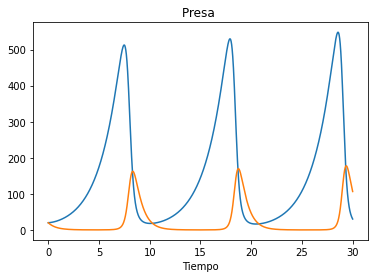

In [ ]:
t= np.arange(nt+1) * h
plt.plot(t, N, label="PRESA")
plt.plot(t, M, label="Depredadores")
plt.xlabel("Tiempo")
plt.title("Presa ")

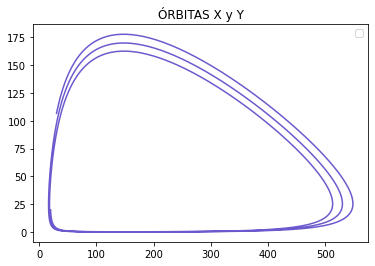

In [ ]:
#ORBITAS
plt.plot(N,M, color="slateblue")
plt.legend(loc="best")
plt.title("ÓRBITAS X y Y")
plt.show()

MODELO ODEINT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def df_dt(x, t, a, b, c, d, e):
    """Función del sistema en forma canónica"""
    dx = (a * x[0]) - (b * x[0] * x[1]) - e*x[0]
    dy = (- c * x[1]) + (d * x[0] * x[1]) - e*x[1]
    return np.array([dx, dy])
# Parámetros
a = 1.0
b = 0.02
c = 1.0
d = 0.01
e = 0.5
# Condiciones iniciales
x0 = 20   # Presas
y0 = 20   # Depredadores
conds_iniciales = np.array([x0, y0])
# Condiciones para integración
tf = 30
Nn = 3001
t = np.linspace(0, tf, Nn)
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d, e))

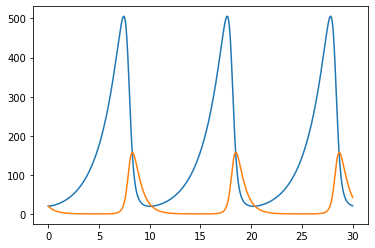

In [ ]:
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')

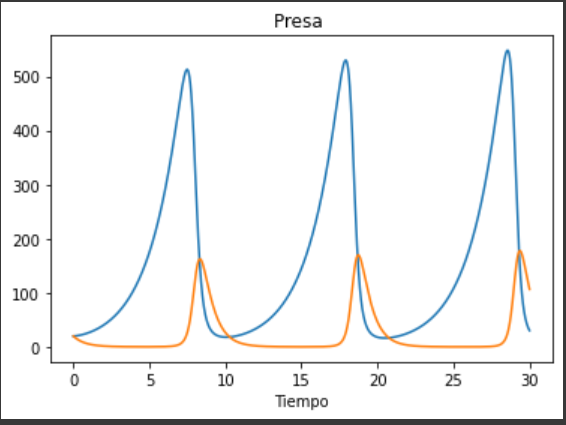

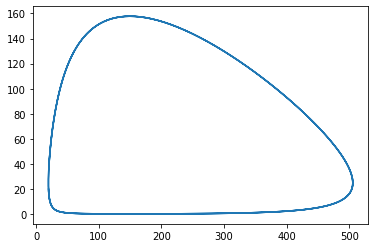

In [ ]:
x_max = np.max(solucion[:,0]) * 1.05
y_max = np.max(solucion[:,1]) * 1.05
x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)
xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0, a, b, c, d, e)
norm = np.sqrt(uu**2 + vv**2)
plt.plot(solucion[:, 0], solucion[:, 1])

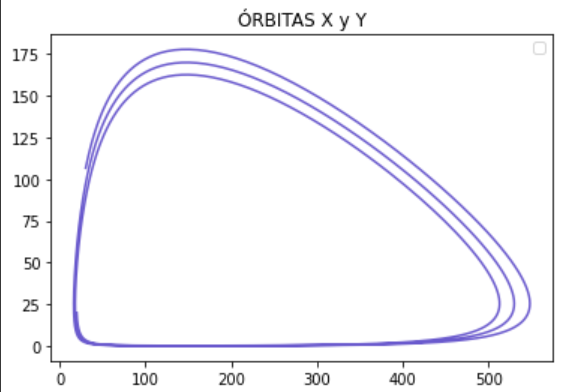

Comparación 

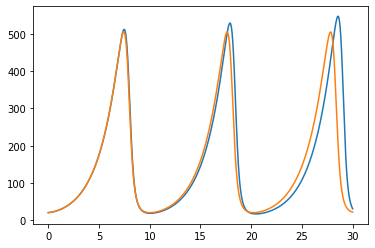

In [ ]:
plt.plot(t, N, label='Presa')
plt.plot(t, solucion[:, 0], label='Presa ODEINT')

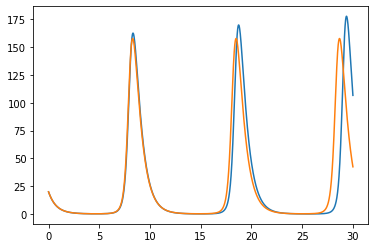

In [ ]:
plt.plot(t, M, label='depredador')
plt.plot(t, solucion[:, 1], label='Depredador ODEINT')